<img src="BirdabilityLogo.jpg" alt="drawing" width="500"/>

# <b>Making Birding Accessible to All</b>

#### *Presented by Sara Pancheri*

<img src="divider.jpg" alt="drawing" width="200"/>

## <u>Birding: What is it?</u>


Bird watching
: also known in its more inclusive form as 'birding', is the act of observing birds (animals of the class <i>Aves</i>). This activity is usually done using binoculars or telescopes but can also be done with the naked eye or just by listening to bird songs/calls and identifying the various species. It is possible to record the findings or simply identify and move on. The data collected could be used as a means for research, recreational purposes, or citizen science endeavors. 

Birding has multitude of benefits in society. For one, bird-watching tours (or ‘avitourism’) has become increasingly popular in the last 40 years – with approximately three million international trips being centered on bird watching annually. Studies showed that avitourism and birding-based activities can help conflict-affected countries as well: Colombia, for example, has the highest number of bird species in the world and is consistently the most popular location for birders around the world. It has been shown that developing better infrastructure and tourism around birding would hold off the government from putting so much emphasis on natural resource extraction and create a cleaner, conservation-based alternative to economic growth (Ocampo-Peñuela, et al., 2017).

Though the money spent and invested in birding activities is usually put back into conservation of the bird species, data is also golden for research. Indeed, whether it is simple citizen science or research-level observations, every bit of data is important to know where to focus conservation efforts. For example, a 2012 study revealed that bird migration and distribution patterns had changed in China from 2003 to 2007. This signaled to conservationists a few things: protected land limits had to be changed, climate change had a quicker and bigger impact on bird species than previously thought, and that citizen science data was crucial to following bird trends (Li, et al., 2012).
Sites such as [eBird](https://ebird.org/home) and [iNaturalist](https://www.inaturalist.org/) are accessible to all and have community fact-checkers that monitor entries to make sure they make sense with the location and time of year the bird was observed. 

Finally, bird feeding and observing has been shown to be a good gateway to reconnecting with nature (Cox, et al., 2016). It is a simple enough activity for beginners, as it could be done from people's own backyards or sidewalks. As part of a survey showing the benefits of 'green activities', of which birding is one, participants noticed that they were less stressed, more sociable and connected with their communnity, and felt fitter/healthier when engaging in these activities (Peacock, et al., 2007).

<img src="BirdingStats.jpg" alt="drawing" width="500"/>

*Figure 1: Visual representation of statistics on the avitourim industry around the world.
[Source](https://www.responsibletravel.org/wp-content/uploads/sites/213/2021/03/market-analysis-bird-based-tourism.pdf)*

<b>What of people who simply do not have easy access to birding? People with limited mobility, visual or hearing impairments? How does disability enter in the birding world?</b>

## <u>Birdability: Because Birding if for Everybody!</u>

The Birdability organization primarily works through education and outreach to ensure that the birding community and the outdoors are <mark>inclusive, accessible, and safe for everyone</mark>. They focus on making birding accessible to people with disabilities, who are sometimes unable to do this activity due to lack of available resources. 

As previously stated, birding has more than just economic benefits - it helps with mental & physical health as well as conservation efforts worldwide. It is unfair and shameful that a part of the population is unable to have access to it due to lack of infrastructure and resources. 

According to the organization, a disability is defined by
> any physical, cognitive, or mental diagnosis, condition, illness, injury or otherwise that impacts someone’s ability to do a particular activity; in this case, go birding as they would like. May be temporary, intermittent, or permanent. Some disabilities that are advocated for include people with mobility challenges, blindness/low vision, chronic illnesses, intellectual or developmental disabilities, mental illness, deafness/hard of hearing, and those who are neurodivergent.


One of the most known and popular features created by Birdability is their [map](https://gis.audubon.org/birdability/). This map is volunteer-based, and shows data related to accessibility of all assessed parks around the world. Due to organization being relatively new, there is still much data lacking for the rest of the world. 

According to [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310075001), in 2019 **523 600 or 15.9%** of people living in Montreal are identify as being disabled or having a disability - this number only grows if the definition put in by Birdability is considered. This is a significant number, and shows that it is even more important to assess our own parks/birding spaces to make sure they are suitable for everyone. 

**The goal of this report is to assess which area of Montreal, Quebec has the most amount of bird observations using Python (Pandas, Geopandas, etc.) mapping techniques. Once this is done, the largest park of the area will be assessed using Birdability standards of accessibility to thenafter enter our results in their database.**

<img src="divider.jpg" alt="drawing" width="200"/>

## <u>Methodology</u>

Montreal bird observation data was extracted using the [iNaturalist](https://www.inaturalist.org/observations?place_id=139965&iconic_taxa=Aves) database. This resulted in a csv file that we will be importing here and visualizing. Data was cleaned up in EXCEL to delete certain unneeded columns and ESRI's ArcMap to be turned into a shapefile.

In [1]:
#Import all modules needed to complete the analysis

import pandas as pd
import geopandas as gpd
import glob as glob
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data of all bird observations from iNaturalist
geoms_filenames = glob.glob('*.shp')
mtlBirds = gpd.read_file(geoms_filenames[1])

Montreal administration limits were taken from [Données Montréal](https://donnees.montreal.ca/ville-de-montreal/polygones-arrondissements) as a shapefile. 

In [3]:
#Import data of all Montreal dessimation areas from Données Montréal
geoms_filenames = glob.glob('*.shp')
mtlRegions = gpd.read_file(geoms_filenames[0])

Check coordinate systems of both dataframes, make sure they are the same for spatial join. In this case, we took the Montreal Bird data and changed its coordinate system reference to that of the Montreal administration limits.

In [4]:
#mtlRegions.crs  -- EPSG:4326
#mtlBirds.crs    -- PCS_Lambert_Conformal_Conic

mtlBirds= mtlBirds.to_crs('EPSG:4326')

We will be performing a spatial join in order to see how many birds there are per administrative region. 

In [5]:
birdRegions_sjoined = mtlBirds.sjoin(mtlRegions, how='inner',predicate = 'intersects')
# birdRegions_sjoined = birdRegions_sjoined.drop(['AIRE','PERIM','ERNAME','SACCODE','CMAPUID','CMANAME','CMATYPE'],axis=1)
birdRegions_sjoined

,id,latitude,longitude,scientific,common_nam,geometry,index_right,MUNID,CODEID,CODEMAMROT,NOM,TYPE,ABREV,NUM,AIRE,PERIM
0,316465,45.560890,-73.560892,Turdus migratorius,American Robin,POINT (-73.56089 45.56089),23,66023,8,REM24,Rosemont-La Petite-Patrie,Arrondissement,RO,25,1.588653e+07,19394.163
9,1728728,45.561889,-73.563272,Cardinalis cardinalis,Northern Cardinal,POINT (-73.56327 45.56189),23,66023,8,REM24,Rosemont-La Petite-Patrie,Arrondissement,RO,25,1.588653e+07,19394.163
39,3447893,45.564755,-73.554650,Columba livia,Rock Pigeon,POINT (-73.55465 45.56475),23,66023,8,REM24,Rosemont-La Petite-Patrie,Arrondissement,RO,25,1.588653e+07,19394.163
42,3612323,45.560349,-73.556722,Turdus migratorius,American Robin,POINT (-73.55672 45.56035),23,66023,8,REM24,Rosemont-La Petite-Patrie,Arrondissement,RO,25,1.588653e+07,19394.163
43,3613252,45.559759,-73.563153,Agelaius phoeniceus,Red-winged Blackbird,POINT (-73.56315 45.55976),23,66023,8,REM24,Rosemont-La Petite-Patrie,Arrondissement,RO,25,1.588653e+07,19394.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,75226979,45.630146,-73.505547,Cardinalis cardinalis,Northern Cardinal,POINT (-73.50555 45.63015),28,66023,60,66007,Montréal-Est,Ville liée,ME,74,1.397401e+07,16860.148
6368,75666825,45.630394,-73.505684,Strix varia,Barred Owl,POINT (-73.50568 45.63039),28,66023,60,66007,Montréal-Est,Ville liée,ME,74,1.397401e+07,16860.148
6814,78909735,45.631203,-73.494665,Turdus migratorius,American Robin,POINT (-73.49466 45.63120),28,66023,60,66007,Montréal-Est,Ville liée,ME,74,1.397401e+07,16860.148
7356,84464085,45.629385,-73.495028,Dryobates villosus,Hairy Woodpecker,POINT (-73.49503 45.62938),28,66023,60,66007,Montréal-Est,Ville liée,ME,74,1.397401e+07,16860.148


Calculate the number of times each borough is mentioned; This will show how many bird observations per administration limit

In [6]:
from collections import Counter

#Turn column of Borough Names into List
word_list = birdRegions_sjoined['NOM'].to_list()

counts = Counter(word_list)

<center>Table 1: Borough with accompanied Number of Bird Observations</center>

| Borough                     |      Number of Observations    |
|-----------------------------|:------------------------------:|
|Outremont                    |         187          |
|LaSalle                      |         331          |
|Mont-Royal                   |         18           |
|Ville-Marie                  |         1461         |
|Le Plateau-Mont-Royal        |         302          |
|Hampstead                    |         2            |
|Le Sud-Ouest                 |         931          |
|RDP-Pointe-aux-Trembles      |         311          |
|Lachine                      |         386          |
|Dorval                       |         151          |
|Montréal-Nord                |         43           |
|L'Île-Bizard-Sainte-Geneviève|         266          |
|Kirkland                     |         44           |
|Dollard-des-Ormeaux          |         203          |
|Senneville                   |         133          |
|Ahuntsic-Cartierville        |         267          |
|Côte-Saint-Luc               |         17           |
|Saint-Léonard                |         11           |
|Montréal-Ouest               |         6            |
|Pointe-Claire                |         176          |
|L'Île-Dorval                 |         3            |
|Mercier-Hochelaga-Maisonneuve|         240          |
|Côte-des-Neiges-NDG          |         250          |
|Rosemont-La Petite-Patrie    |         858          |
|Saint-Laurent                |         1279         |
|Beaconsfield                 |         67           |
|Villeray-St-Michel-Parc-Ex   |         93           |
|Westmount                    |         65           |
|Montréal-Est                 |         5            |
|Anjou                        |         68           |
|Pierrefonds-Roxboro          |         294          |
|Sainte-Anne-de-Bellevue      |         1741         |
|Verdun                       |         831          |
|Baie-d'Urfé                  |         261          |


Add numbered column to original mtlRegions geodataframe. 

In [7]:
listValues =[187, 331, 18, 1461,302,2,931,311,386,151,43,266,44,203,133,267,17,11,6,176,3,240,250,858,1279,67,93,65,5,68,294,1741,831,261] 

mtlRegions['# Bird Observations'] = listValues
mtlRegions.head()

,MUNID,CODEID,CODEMAMROT,NOM,TYPE,ABREV,NUM,AIRE,PERIM,geometry,# Bird Observations
0,66023,11,REM05,Outremont,Arrondissement,OM,5,3.813356e+06,10836.670,"POLYGON ((-73.62078 45.52365, -73.62020 45.524...",187
1,66023,22,REM17,LaSalle,Arrondissement,LS,18,2.519727e+07,25259.849,"POLYGON ((-73.66610 45.42180, -73.66601 45.428...",331
2,66023,62,66072,Mont-Royal,Ville liée,MR,2,7.445560e+06,18314.038,"POLYGON ((-73.65075 45.52631, -73.65036 45.526...",18
3,66023,9,REM19,Ville-Marie,Arrondissement,VM,20,2.150063e+07,26585.959,"POLYGON ((-73.53013 45.53476, -73.53019 45.534...",1461
4,66023,5,REM21,Le Plateau-Mont-Royal,Arrondissement,PM,22,8.151665e+06,13158.328,"POLYGON ((-73.55923 45.53990, -73.56017 45.538...",302


Calculate percentage of bird observations per borough compare to total amount of observations in Montreal

In [8]:
totalBirds = mtlRegions['# Bird Observations'].sum() #11301

#Percentage
mtlRegions['Bird%'] = (mtlRegions['# Bird Observations']/totalBirds)*100
mtlRegions.head()

,MUNID,CODEID,CODEMAMROT,NOM,TYPE,ABREV,NUM,AIRE,PERIM,geometry,# Bird Observations,Bird%
0,66023,11,REM05,Outremont,Arrondissement,OM,5,3.813356e+06,10836.670,"POLYGON ((-73.62078 45.52365, -73.62020 45.524...",187,1.654721
1,66023,22,REM17,LaSalle,Arrondissement,LS,18,2.519727e+07,25259.849,"POLYGON ((-73.66610 45.42180, -73.66601 45.428...",331,2.928944
2,66023,62,66072,Mont-Royal,Ville liée,MR,2,7.445560e+06,18314.038,"POLYGON ((-73.65075 45.52631, -73.65036 45.526...",18,0.159278
3,66023,9,REM19,Ville-Marie,Arrondissement,VM,20,2.150063e+07,26585.959,"POLYGON ((-73.53013 45.53476, -73.53019 45.534...",1461,12.928059
4,66023,5,REM21,Le Plateau-Mont-Royal,Arrondissement,PM,22,8.151665e+06,13158.328,"POLYGON ((-73.55923 45.53990, -73.56017 45.538...",302,2.672330


Plot map to make sure it works and makes sense

<AxesSubplot:>

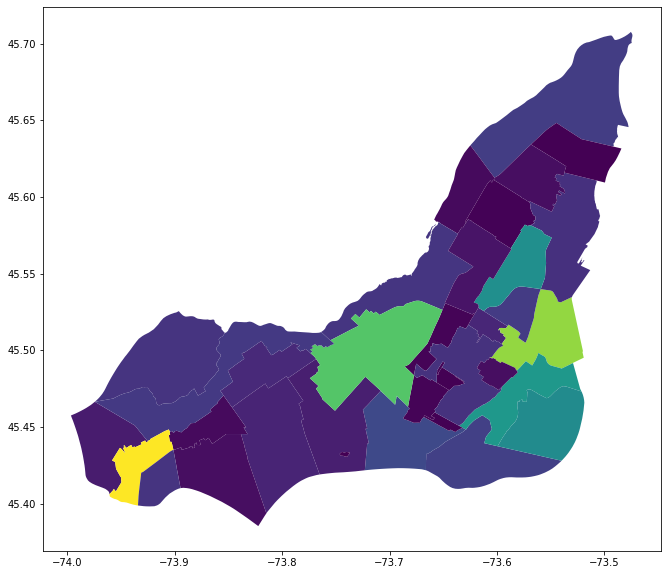

In [9]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))
mtlRegions.plot(column = 'Bird%', ax = ax)

HOORAY! It looks good.
A separate python file was created with all plotting elements in order to simply call it and make many maps with similar parameters. 
The first map plotted represents the percentage of bird observations by administrative limit across Montreal.

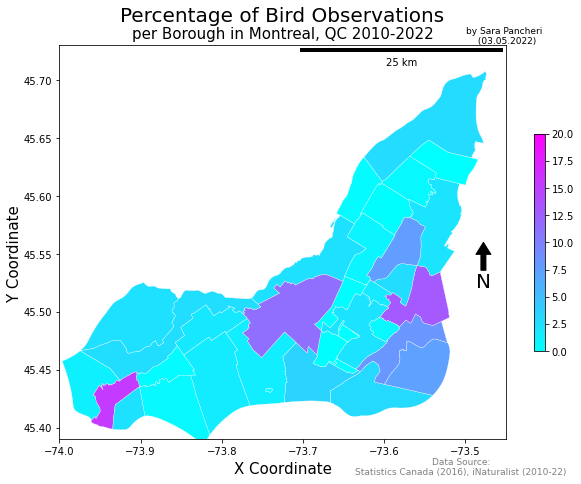

In [10]:
import mapCall


fig = mapCall.map_drawing(mtlRegions
            ,'Bird%'
            ,"Percentage of Bird Observations"
            ,"per Borough in Montreal, QC 2010-2022"
            ,-74.0
            ,-73.45
            ,45.39
            ,45.73
            ,"Data Source:" + '\n' + "Statistics Canada (2016), iNaturalist (2010-22)"
            ,"by Sara Pancheri \n (03.05.2022)"
            ,ax)


According to the table, and the map - the region administrative region with the most amount of observations is Sainte-Anne-de-Bellevue, in the Western point of Montreal. 

A zoom-in to the location will be done show the exact area we are talking about

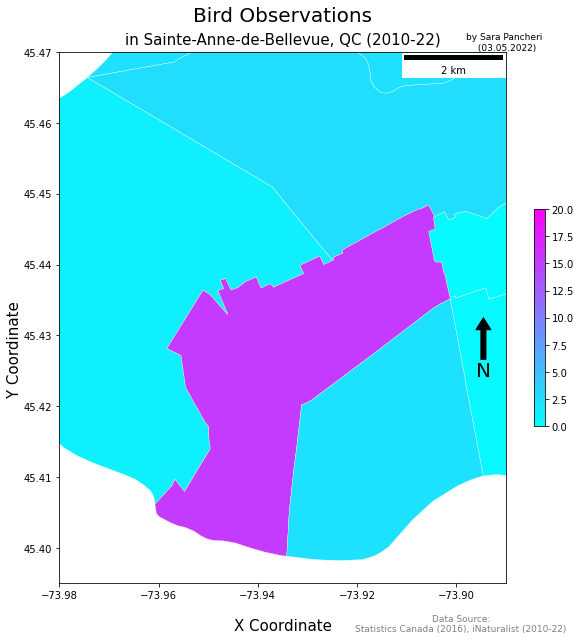

In [11]:
fig1 = mapCall.map_drawing(mtlRegions
            ,'Bird%'
            ,"Bird Observations"
            ,"in Sainte-Anne-de-Bellevue, QC (2010-22)"
            ,-73.98
            ,-73.89
            ,45.395
            ,45.47
            ,"Data Source:" + '\n' + "Statistics Canada (2016), iNaturalist (2010-22)"
            ,"by Sara Pancheri \n (03.05.2022)"
            ,ax)


Here, the area can be seen in bright pink; These results are in accordance with what we can see on the actual iNaturalist map, and therefore will become the focus of our assessment.

![alt text](iNaturalistSainteAnne.jpg)

<i>Figure 2: Sainte-Anne-de-Bellevue area with all iNaturalist points.</i>
[Source](https://www.inaturalist.org/observations?nelat=45.44851894150879&nelng=-73.90090307481364&place_id=any&subview=map&swlat=45.39957283735265&swlng=-73.97233790291602&taxon_id=3)

As we can see from this map, Sainte-Anne-de-Bellevue is home to the famous Ecomuseum Zoo, the Morgan Arboretum and part of the Senneville Migratory Bird Sanctuary. 
Due to its popularity, I have chosen to assess the Ecomuseum - since it is more than a park and more popular, it should have better accessibility for birding. 

## <u>Assessing the Ecomuseum according to Birdability Standards</u>

![alt text](EcomuseumBirds.jpg)

<i>Figure 3: Ecomuseum area with all iNaturalist points.</i>
[Source](https://www.inaturalist.org/observations?d1=2010&d2=2022&place_id=any&subview=map&taxon_id=3)

Here is the completed Birdability checklist done for the Ecomuseum 

In [12]:
from IPython.display import IFrame
IFrame("BirdabilitySiteReview.pdf", width=1000, height=400)

If this is something you'd like to one day do as well, the [checklist](https://static1.squarespace.com/static/5fbd78994a599a774a4156dd/t/60fad64627d9a56e8b04a243/1627051590360/Birdability+Site+Review+Checklist_accessible+PDF_2021.pdf) can be found there.

<img src="divider.jpg" alt="drawing" width="200"/>

## <u>Conclusion</u>

Through the maps connecting bird points to administrative limits of Montreal, it was possible to find the region with the most bird observations. With these results, it was possible to choose a location and assesss it using the Birdability standards of accessibility. It was concluded that the Ecomuseum Zoo, though fairly accessible for people who are hard-of-heard, wheelchair users, and most mentally ill folk - it was deemed, overall, needing of improvement. Some areas (such as the indoor exhibits of reptiles and fish) were completely inaccessible to wheelchair users and those with limited mobility (only accessible by stairs) or needed a ramp installed to be accessed (Duck Sanctuary). Guide/ support dogs are prohibited (no exceptions), which is understandable due to the nature of the organization - but this limits a lot of people with disabilities who require their support animal to go out. 

There were many limitations to this project. 
For one, it had been a goal to be able to find a database with point data or census data of disability distribution across Montreal. This would have allowed me to find the proportion of disabled people-to-bird observations in order to see which areas should be prioritized and developed. However, it is impossible to find such data. All data found was either a generalization (as found on Statistics Canada) or only included school children data. This was not enough to properly achieve the goal. Additionally, data from Données Québec and Montréal included poverty rates in the scarce data that could be found, which skewed the results we were looking for. 

Another limitation was the bird observations. Althought iNaturalist is a very popular app and website, eBird would have been a much better choice. However, it is not possible to extract proper data from eBird at this time. The choice of iNaturalist was taken because it was the best option available: free, more than a handful of datapoints, and download-able. 

Finally, some of the issues stemmed from the programming portion itself (of course). The biggest issue was getting 'ipyleaflet' to work. This would have been an interactive map, where people can zoom around the areas and make it much more user-friendly. However, it did not work with my versions of jupyter notebooks / python. It would have required that conda be installed, but there were issues with that - in which version were not working and making my jupyter notebook bug. This was very frustrating, because it would have been an interesting addition to the project. 

<u>Thought on the future</u>
I would like to, one day, access data regarding disability across Montreal (something more detailed than simply knowing that 15.9% of Montrealers have a 'disability' according to Federal Government definition). This would allow for better resource management and prioritization for more than just birding in each borough. If municipalities have access to this information but it is not yet public, I think it would be important to publish it. This would allow students, such as myself, to better understand the city we live in and make more projects related to the topic of disability in the city. I would like to thank the Birdability organization, without them I would have never been properly education and sensitized to this topic. 

<img src="divider.jpg" alt="drawing" width="200"/>

### <u>Bibliography</u>

1. Cox, D. T., & Gaston, K. J. (2016, July 18). Urban Bird Feeding: Connecting People with Nature. PLOS. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0158717
2. Li, X. Y., Liang, L., Gong, P., Liu, Y., & Liang, F. (2012, September 15). Bird watching in China Reveals Bird Distribution Changes. Chinese Science Bulletin. 58. pp 649–656. https://link.springer.com/article/10.1007/s11434-012-5458-7
3. Ocampo-Peñuela, N., & Winton, R. S. (2017, October 9). Economic and Conservation Potential of Bird-Watching Tourism in Postconflict Colombia. Sage Journals. 10. https://journals.sagepub.com/doi/full/10.1177/1940082917733862
4. Peacock, J., Hine, R., & Pretty, J. (2007, February). The Mental Health Benefits of Green Exercise Activities and Green Care. Reconnect in Nature. https://reconnectinnature.org.uk/wp-content/uploads/2018/08/essexdata.pdf
